# Part 1
Go to the eurostat website and try to find a dataset that includes the european unemployment rates at a recent date.

Use this data to build a Choropleth map which shows the unemployment rate in Europe at a country level. Think about the colors you use, how you decided to split the intervals into data classes or which interactions you could add in order to make the visualization intuitive and expressive. 
Compare Switzerland's unemployment rate to that of the rest of Europe.

In [67]:
import folium,json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
EUROSTAT_UNEMPLOYMENT_TIPSUN20_DATASET = 'Eurostat_tipsun20.xls'
#EUROPE_JSON = r'eu-countries.geo.json' # from https://github.com/Leaflet/Leaflet.VectorGrid

EUROPE_JSON = r'europe.geojson' # from https://github.com/leakyMirror/map-of-europe/blob/master/GeoJSON/europe.geojson



 The unemployment rate is the number of unemployed persons expressed as a percentage of the labour force, based on the International Labour Office (ILO) definition.
 
 Info about choosen dataset:
 Unemployment rate - annual data
 We used the following dataset : http://ec.europa.eu/eurostat/web/products-datasets/-/tipsun20
 
 Hyperlink to the table: http://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&plugin=1&language=en&pcode=tipsun20

 Code: tipsun20
 
 Last update:31.10.2017


In [3]:
unemploymentRates_full = pd.read_excel(open(EUROSTAT_UNEMPLOYMENT_TIPSUN20_DATASET,'rb'), sheetname='Sheet0') #,index_col='Country'
unemploymentRates_full

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Belgium,9.7,9.5,9.2,9.3,8.4,6.9,6.6,7.5,8.2,...,7.5,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8
1,Bulgaria,:,:,:,:,:,16.4,19.6,18.2,13.7,...,6.9,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6
2,Czech Republic,4,3.9,4.8,6.5,8.7,8.8,8.1,7.3,7.8,...,5.3,4.4,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0
3,Denmark,6.7,6.3,5.2,4.9,5.2,4.3,4.5,4.6,5.4,...,3.8,3.4,6.0,7.5,7.6,7.5,7.0,6.6,6.2,6.2
4,Germany,8.2,8.9,9.6,9.4,8.6,7.9,7.8,8.6,9.7,...,8.5,7.4,7.6,7.0,5.8,5.4,5.2,5.0,4.6,4.1
5,Estonia,:,:,:,:,:,14.6,13.0,11.2,10.3,...,4.6,5.5,13.5,16.7,12.3,10.0,8.6,7.4,6.2,6.8
6,Ireland,12.3,11.7,9.9,7.5,5.6,4.3,3.9,4.5,4.6,...,4.7,6.4,12.0,13.9,14.7,14.7,13.1,11.3,9.4,7.9
7,Greece,:,:,:,11.1,12,11.2,10.7,10.3,9.7,...,8.4,7.8,9.6,12.7,17.9,24.5,27.5,26.5,24.9,23.6
8,Spain,20.7,19.9,18.4,16.4,13.6,11.9,10.6,11.5,11.5,...,8.2,11.3,17.9,19.9,21.4,24.8,26.1,24.5,22.1,19.6
9,France,10.2,10.5,10.7,10.3,10,8.6,7.8,7.9,8.5,...,8.0,7.4,9.1,9.3,9.2,9.8,10.3,10.3,10.4,10.1


We decide to remove all columnns containing missing values. It turns out it only concerns the earlier years (from 1995 to 1999). We consider that, for the granted task, it's ok to omit those columns and there is enough data and most importantly they are continous in time. So we don't alter any eventual pattern.
Also imputing those missing values would be delicate as the situation for each country can vary widely in a year.

In [34]:
unemploymentRates= unemploymentRates_full[[column for column in unemploymentRates_full.columns if '199' not in column]]
unemploymentRates['average'] = unemploymentRates.mean(axis=1)
unemploymentRates= unemploymentRates.sort_values(['average'], ascending=True)
unemploymentRates

/Users/Sina-Mac/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
15,Luxembourg,2.2,1.9,2.6,3.8,5.0,4.6,4.6,4.2,4.9,5.1,4.6,4.8,5.1,5.9,6.0,6.5,6.3,4.594118
19,Austria,3.9,4.0,4.4,4.8,5.5,5.6,5.3,4.9,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,4.988235
18,Netherlands,3.7,3.1,3.7,4.8,5.7,5.9,5.0,4.2,3.7,4.4,5.0,5.0,5.8,7.3,7.4,6.9,6.0,5.152941
3,Denmark,4.3,4.5,4.6,5.4,5.5,4.8,3.9,3.8,3.4,6.0,7.5,7.6,7.5,7.0,6.6,6.2,6.2,5.576471
27,United Kingdom,5.4,5.0,5.1,5.0,4.7,4.8,5.4,5.3,5.6,7.6,7.8,8.1,7.9,7.5,6.1,5.3,4.8,5.964706
17,Malta,6.7,7.6,7.0,7.6,7.2,6.9,6.8,6.5,6.0,6.9,6.9,6.4,6.3,6.4,5.8,5.4,4.7,6.535294
2,Czech Republic,8.8,8.1,7.3,7.8,8.3,7.9,7.1,5.3,4.4,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0,6.758824
22,Romania,7.6,7.4,8.3,7.7,8.0,7.1,7.2,6.4,5.6,6.5,7.0,7.2,6.8,7.1,6.8,6.8,5.9,7.023529
23,Slovenia,6.7,6.2,6.3,6.7,6.3,6.5,6.0,4.9,4.4,5.9,7.3,8.2,8.9,10.1,9.7,9.0,8.0,7.123529
26,Sweden,5.6,5.8,6.0,6.6,7.4,7.7,7.1,6.1,6.2,8.3,8.6,7.8,8.0,8.0,7.9,7.4,6.9,7.141176


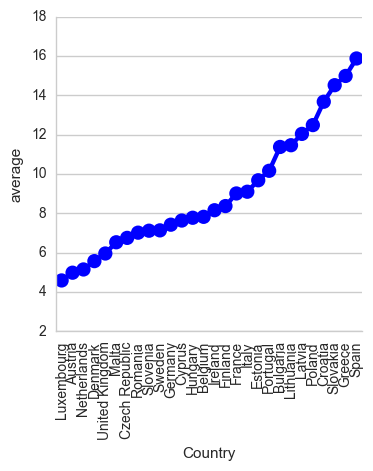

In [68]:
g= sns.factorplot(x="Country", y="average", data=unemploymentRates,color='b');
plt.xticks(rotation=90, fontsize = 10)
plt.show()

In [69]:
geo_json_data = json.load(open(EUROPE_JSON))
features = geo_json_data['features'][0]
print(features.keys())
print(features['properties'].keys())
print(geo_json_data['features'][32]['properties']['NAME'])

dict_keys(['properties', 'geometry', 'type'])
dict_keys(['LON', 'REGION', 'FIPS', 'UN', 'POP2005', 'FID', 'LAT', 'ISO3', 'ISO2', 'NAME', 'SUBREGION', 'AREA'])
Monaco


### to remove

folium.GeoJson(geo_json_data).add_to(m_europe)
for feature in geo_json_data['features']:
    theCountry = feature['properties']['NAME']
    ctr_color = ''
    if (theCountry in unemploymentRates.Country.values ):
        ctr_color = europe_unemployement_colors(theCountry)
    else:
        ctr_color = '#000000'
    folium.GeoJson(geo_json_data,style_function=lambda feature: dict(fillColor=ctr_color , color='black', weight=2, opacity=0.6,dashArray= '5,5')
    ).add_to(m_europe)



In [72]:
EU_coordinates = [54.526,15.2551] #y,x
m_europe = folium.Map(EU_coordinates, tiles='cartodbpositron', zoom_start=3.6)
geo_json_data = json.load(open(EUROPE_JSON))

m_europe.choropleth(geo_data= EUROPE_JSON,
                    data=unemploymentRates,
                    columns=['Country', 'average'],
                    key_on='feature.properties.NAME',
                    fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
                    legend_name='Unemployment Rate (%)'
                   )


m_europe